In [1]:
import torch
import torch.nn as nn
import sys
import nltk
import torch.nn.functional as F
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
sys.path.insert(0, '..')
import pickle
from torch.autograd import grad as torch_grad

word_embedding_dim = 50
z_size = 100
output_shape = (1, 105, 8)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gxb18167\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
print(torch.__version__)
print("GPU Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"

2.0.1
GPU Available: False


In [3]:
class Generator(nn.Module):
    def __init__(self, noise_dim, word_embedding_dim, output_shape):
        super(Generator, self).__init__()

        self.noise_dim = noise_dim
        self.word_embedding_dim = word_embedding_dim

        # Define the layers of your generator
        self.fc_noise = nn.Linear(noise_dim, 105*8)  # Increase the size for more complexity
        self.fc_word_embedding = nn.Linear(word_embedding_dim, 105*8)  # Increase the size for more complexity
        self.conv1 = nn.Conv2d(2, 128, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.relu = nn.LeakyReLU(0.2)

        self.conv2 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)
        self.tanh = nn.Tanh()

    def forward(self, noise, word_embedding):
        # Process noise
        noise = self.fc_noise(noise)
        noise = noise.view(noise.size(0), 1, 105,8)  # Adjust the size to match conv1

        # Process word embedding
        word_embedding = self.fc_word_embedding(word_embedding.to(device))
        word_embedding = word_embedding.view(word_embedding.size(0), 1, 105, 8)  # Adjust the size to match conv1

        # Concatenate noise and word embedding
        combined_input = torch.cat([noise, word_embedding], dim=1)

        # Upsample and generate the output
        z = self.conv1(combined_input)
        z = self.bn1(z)
        z = self.relu(z)

        z = self.conv2(z)
        z = self.bn2(z)
        z = self.relu(z)

        z = self.conv3(z)
        z = self.tanh(z)

        return z

In [5]:
# Assuming gen_model is the generator model you used during training
gen_model = Generator(z_size, word_embedding_dim, output_shape)  # Replace with your actual generator model class

d_losses_list = []
g_losses_list = []
#range 5 to 100 every 5
for x in range(5, 100, 5):
    # Load the checkpoint file
    checkpoint = torch.load(r"I:\Science\CIS-YASHMOSH\niallmcguire\WGAN_Text_3.0\checkpoint_epoch_" + str(x) + ".pt",
                            map_location=torch.device('cpu'))  # Load the final model checkpoint

    d_losses = checkpoint['d_losses']
    g_losses = checkpoint['g_losses']

    d_losses_list.append(d_losses)
    g_losses_list.append(g_losses)




In [6]:
d_losses = []
g_losses = []

for x in d_losses_list:
    for i in x:
        d_losses.append(i)
for x in g_losses_list:
    for i in x:
        g_losses.append(i)

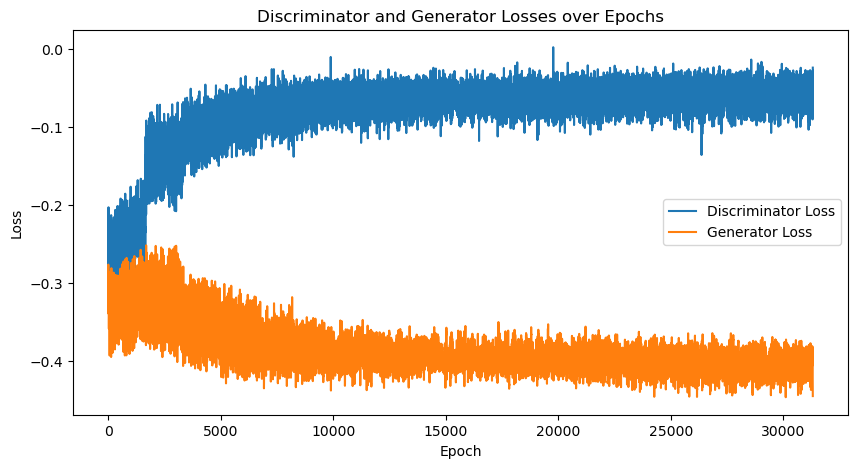

In [7]:
# You can also plot the losses over epochs using a plotting library like matplotlib
import matplotlib.pyplot as plt

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(d_losses) + 1), d_losses, label='Discriminator Loss')
plt.plot(range(1, len(g_losses) + 1), g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses over Epochs')
plt.legend()
plt.show()

In [18]:
g_losses

[-0.293265163898468,
 -0.287233829498291,
 -0.2866182029247284,
 -0.28479307889938354,
 -0.2886147201061249,
 -0.2937213182449341,
 -0.29125016927719116,
 -0.29065239429473877,
 -0.2960584759712219,
 -0.2965007424354553,
 -0.2968425154685974,
 -0.29867687821388245,
 -0.29753708839416504,
 -0.2976112365722656,
 -0.2935120463371277,
 -0.29310935735702515,
 -0.2895265519618988,
 -0.2939797043800354,
 -0.29970574378967285,
 -0.29864174127578735,
 -0.2920956015586853,
 -0.295215368270874,
 -0.2885946035385132,
 -0.28222572803497314,
 -0.280828058719635,
 -0.2856690585613251,
 -0.28291648626327515,
 -0.2837590277194977,
 -0.2798835039138794,
 -0.28505903482437134,
 -0.2855023443698883,
 -0.29103171825408936,
 -0.2950124442577362,
 -0.2963204085826874,
 -0.29701608419418335,
 -0.2935669422149658,
 -0.2925550043582916,
 -0.3025932312011719,
 -0.30312401056289673,
 -0.3013944625854492,
 -0.3005691170692444,
 -0.301708459854126,
 -0.29686239361763,
 -0.2992341220378876,
 -0.2973901331424713,
 -0